In [4]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\henri\OneDrive\Área de Trabalho\Desktop\Credit Card Fraud\PS_20174392719_1491204439457_log.csv")

In [9]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Here are some consinderations about synthetic data set provided by PaySim:

    - It was based on real one month transactions from a mobile financial service implemented in an Affrican country;
    
    - The original logs were provided by a multinacional company that runs in 14 countries all around the world;
    
    - This synthetic dataset is scaled down 1/4 from original and it was created just for Kaggle;
       
    - Kaggle url: https://www.kaggle.com/ealaxi/paysim1

Columns description:
    
    - step: maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation);
    
    - type: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER;
    
    - amount: amount of the transaction in local currency;
    
    - nameOrig: customer who started the transaction;
    
    - oldbalanceOrg: initial balance before the transaction;
    
    - newbalanceOrig: new balance after the transaction;
    
    - nameDest: customer who is the recipient of the transaction;
    
    - oldbalanceDest: initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants);
    
    - newbalanceDest: new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants);
    
    - isFraud: This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control of customers accounts and try to empty the funds by transfering to another account and then cashing out of the system;
    
    - isFlaggedFraud: The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# **1.0.0 Data Cleaning/Preparation**

## 1.1.0 Understanding data types

In [80]:
df.dtypes

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
day                 int64
hour                int64
CASH_IN             uint8
CASH_OUT            uint8
DEBIT               uint8
PAYMENT             uint8
TRANSFER            uint8
isFraud             int64
dtype: object

## 1.2.0 Looking for empty cells

In [4]:
pd.isna(df).sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [114]:
df.loc[(df["amount"]<=0) & (df["isFraud"]==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


In [6]:
df.drop(df[df.amount==0].index, inplace=True)

- Even though this dataset detected all transaction with amount equals Zero as fraud, these rows will be dropped since have no meaning in real life.

## 1.3.0 Treating high values

In [193]:
len(df.loc[(df['amount']>75000)])

3179573

### Amount < 75k

In [178]:
len(df.loc[(df['amount']<75000) & (df['isFraud']==1)])/(len(df.loc[(df['amount']<75000)]))

0.000437319020769826

### Amount > 75k

In [192]:
len(df.loc[(df['amount']>75000) & (df['isFraud']==1)])/(len(df.loc[(df['amount']>75000)]))

0.002140224489263181

In [179]:
len(df.loc[(df['amount']<75000)])

3183031

## 1.4.0 Data Preparation
Transforming "step" column into day and hours
- I rose a hypothesis that the period of a day may help indicate fraudulent operations;
- Also, "step" was kept because it might help us analysing time series since it is a raw time data.

In [7]:
df["day"] = [step//24 for step in df["step"]]
df["hour"] = [step%24 for step in df["step"]]

# **2.0.0 EDA**

In [29]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,hour
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,9.503158e+00,1.532145e+01
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,5.922111e+00,4.321799e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.200000e+01
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,9.000000e+00,1.600000e+01
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,1.300000e+01,1.900000e+01
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,3.000000e+01,2.300000e+01


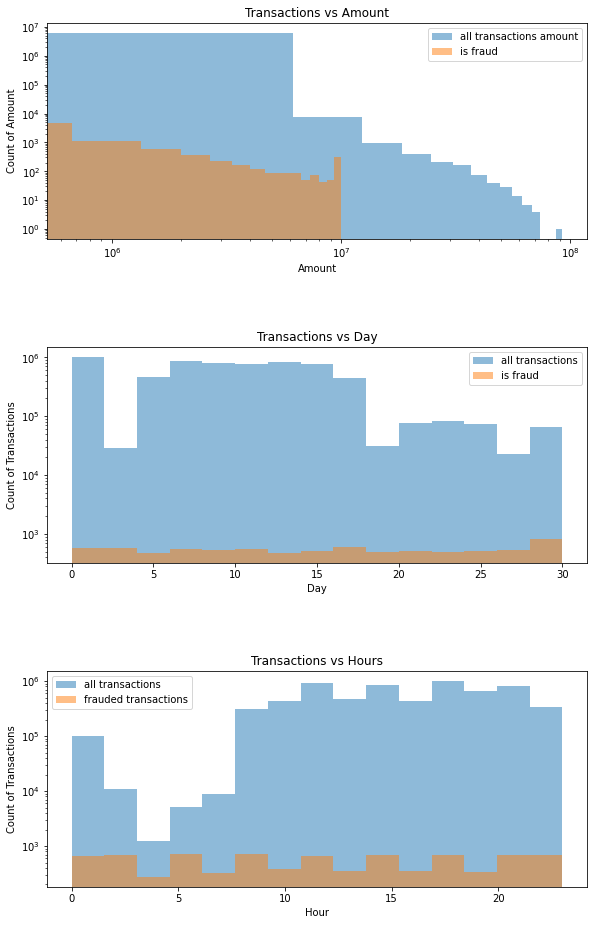

In [6]:
fig = plt.figure(figsize = (3,3))

ax1 = fig.add_axes([0,1,2.5,1])
ax1.hist(df["hour"], bins=15, alpha=0.5, label="all transactions")
ax1.hist(df[df["isFraud"]==1]["hour"], bins=15, alpha=0.5, label="frauded transactions")
ax1.set_xlabel("Hour")
ax1.set_ylabel("Count of Transactions")
ax1.set_title("Transactions vs Hours")
ax1.legend()
plt.yscale('log')

ax2 = fig.add_axes([0,2.5,2.5,1])
ax2.hist(df["day"], bins=15, alpha=0.5, label="all transactions")
ax2.hist(df[df["isFraud"]==1]["day"], bins=15, alpha=0.5, label="is fraud")
ax2.set_xlabel("Day")
ax2.set_ylabel("Count of Transactions")
ax2.set_title("Transactions vs Day")
ax2.legend()
plt.yscale('log')


ax3 = fig.add_axes([0,4,2.5,1])
ax3.hist(df["amount"], bins=15, alpha=0.5, label="all transactions amount")
ax3.hist(df[df["isFraud"]==1]["amount"], bins=15, alpha=0.5, label="is fraud")
ax3.set_xlabel("Amount")
ax3.set_ylabel("Count of Amount")
ax3.set_title("Transactions vs Amount")
ax3.legend()
plt.yscale('log')
plt.xscale('log')

In [30]:
df.groupby(['type', 'isFraud'])['isFraud'].count()/df.groupby(['type'])['step'].count()

type      isFraud
CASH_IN   0          1.000000
CASH_OUT  0          0.998160
          1          0.001840
DEBIT     0          1.000000
PAYMENT   0          1.000000
TRANSFER  0          0.992312
          1          0.007688
dtype: float64

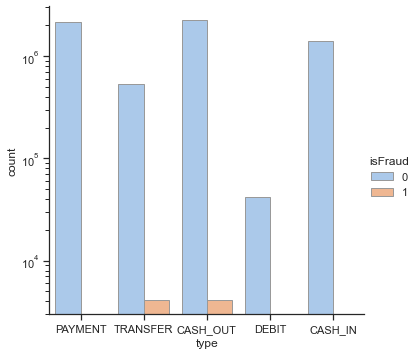

In [95]:
sns.catplot(x="type", hue="isFraud", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.yscale('log')

- Fraudulent transactions do not follow human behavior as seen in hour and days comparision;
- But they have same behavior regarding amount;
- Response rate as isFraud equals 1 occurs only for CASH_OUT and TRANSFER;
- Frequency rate for both of them is very low since we're dealing with anomaly detection.

## 2.1.0 All Fraud cases (deeper analysis)

### 2.1.1 isFlaggedFraud Analysis

In [86]:
df.loc[(df['isFlaggedFraud'] == 0) & (df['type'] == 'TRANSFER') & (df['amount'] > 200000) & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.00,C431687661,0.0,0.0,1,0
2301,1,TRANSFER,235238.66,C1872047468,235238.66,0.00,C116289363,0.0,0.0,1,0
3059,2,TRANSFER,1096187.24,C1093223281,1096187.24,0.00,C2063275841,0.0,0.0,1,0
3162,2,TRANSFER,963532.14,C1440057381,963532.14,0.00,C268086000,0.0,0.0,1,0
4440,4,TRANSFER,10000000.00,C7162498,12930418.44,2930418.44,C945327594,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.00,C1744173808,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.00,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.0,0.0,1,0


In [79]:
df.loc[(df['isFlaggedFraud'] == 0) & (df['type'] == 'TRANSFER') & (df['amount'] > 200000) & (df['isFraud']==1)]['step'].count()

2724

In [80]:
df.loc[(df['isFlaggedFraud'] == 0) & (df['type'] == 'TRANSFER') & (df['amount'] > 200000)]['step'].count()

409094

In [75]:
df.loc[(df['isFlaggedFraud']==1) & (df['isFraud']==0)]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,day,hour,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud


In [74]:
df[(df['isFlaggedFraud']==1) & (df['isFraud']==1)]['step'].count()/df[(df['isFlaggedFraud'] == 1)]['step'].count()

1.0

- isFlaggedFraud is not accurate flagging as fraud single TRANSFER with amount above 200k. This column will not be taken in consideration.

- In transactions where destination are Merchants there are no frauds. 0 frauds in 2151495 transactions;
- All nameOrig with fraud do not appear twice or more;
- 

### 2.1.2 Transfer + Fraud

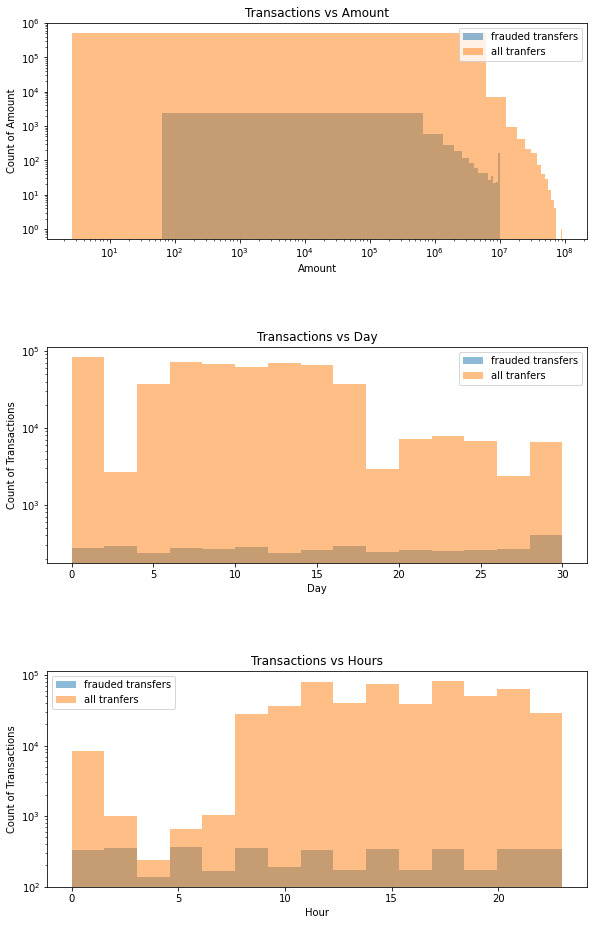

In [14]:
fig = plt.figure(figsize = (3,3))

ax1 = fig.add_axes([0,1,2.5,1])
ax1.hist(df[(df['type'] == 'TRANSFER')&(df['isFraud'] == 1)]["hour"], bins=15, alpha=0.5, label="frauded transfers")
ax1.hist(df[(df['type'] == 'TRANSFER')]["hour"], bins=15, alpha=0.5, label="all tranfers")
ax1.set_xlabel("Hour")
ax1.set_ylabel("Count of Transactions")
ax1.set_title("Transactions vs Hours")
ax1.legend()
plt.yscale('log')

ax2 = fig.add_axes([0,2.5,2.5,1])
ax2.hist(df[(df['type'] == 'TRANSFER')&(df['isFraud'] == 1)]["day"], bins=15, alpha=0.5, label="frauded transfers")
ax2.hist(df[(df['type'] == 'TRANSFER')]["day"], bins=15, alpha=0.5, label="all tranfers")
ax2.set_xlabel("Day")
ax2.set_ylabel("Count of Transactions")
ax2.set_title("Transactions vs Day")
ax2.legend()
plt.yscale('log')

ax3 = fig.add_axes([0,4,2.5,1])
ax3.hist(df[(df['type'] == 'TRANSFER')&(df['isFraud'] == 1)]["amount"], bins=15, alpha=0.5, label="frauded transfers")
ax3.hist(df[(df['type'] == 'TRANSFER')]["amount"], bins=15, alpha=0.5, label="all tranfers")
ax3.set_xlabel("Amount")
ax3.set_ylabel("Count of Amount")
ax3.set_title("Transactions vs Amount")
ax3.legend()
plt.xscale('log')
plt.yscale('log')

- Same behavior as All Transactions vs All Fraud. So we do not differ TRANSFER behavior from others.

In [98]:
df[(df['type'] == 'TRANSFER')&(df['amount'] == df['oldbalanceOrg'])].count()

step              3943
type              3943
amount            3943
nameOrig          3943
oldbalanceOrg     3943
newbalanceOrig    3943
nameDest          3943
oldbalanceDest    3943
newbalanceDest    3943
isFraud           3943
isFlaggedFraud    3943
day               3943
hour              3943
dtype: int64

In [102]:
df[(df['type'] == 'TRANSFER')&(df['isFraud']==1)&(df['amount']>df['oldbalanceOrg'])]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
25875,8,TRANSFER,1078013.76,C1026280121,0.00,0.0,C277510102,0.00,970749.68,1,0
138559,11,TRANSFER,1933920.80,C1706582969,0.00,0.0,C461905695,1283762.85,3217683.65,1,0
217978,13,TRANSFER,123194.95,C2143112877,79466.45,0.0,C1755380031,535933.16,263908.84,1,0
920521,43,TRANSFER,1395850.55,C1296215617,0.00,0.0,C1429415136,260806.21,1656656.77,1,0
1021951,47,TRANSFER,202978.65,C1932446672,0.00,0.0,C966173999,2122336.55,2325315.19,1,0


In [107]:
df[(df['type'] == 'TRANSFER')&(df['isFraud']==1)&(df['oldbalanceDest']==df['newbalanceDest'])]['step'].count()/df[(df['type'] == 'TRANSFER')&(df['isFraud']==1)]['step'].count()

0.992921649987796

In [106]:
df[(df['type'] == 'TRANSFER')&(df['isFraud']==1)&(df['amount']==df['oldbalanceOrg'])]['step'].count()/df[(df['type'] == 'TRANSFER')&(df['isFraud']==1)]['step'].count()

0.9624115206248475

- Almost all transfer fraud cases occurs when amount=oldbalanceOrg;
- When Destination balance doesn't change 97% are fraud.

### 2.1.3 Cash_Out + Fraud

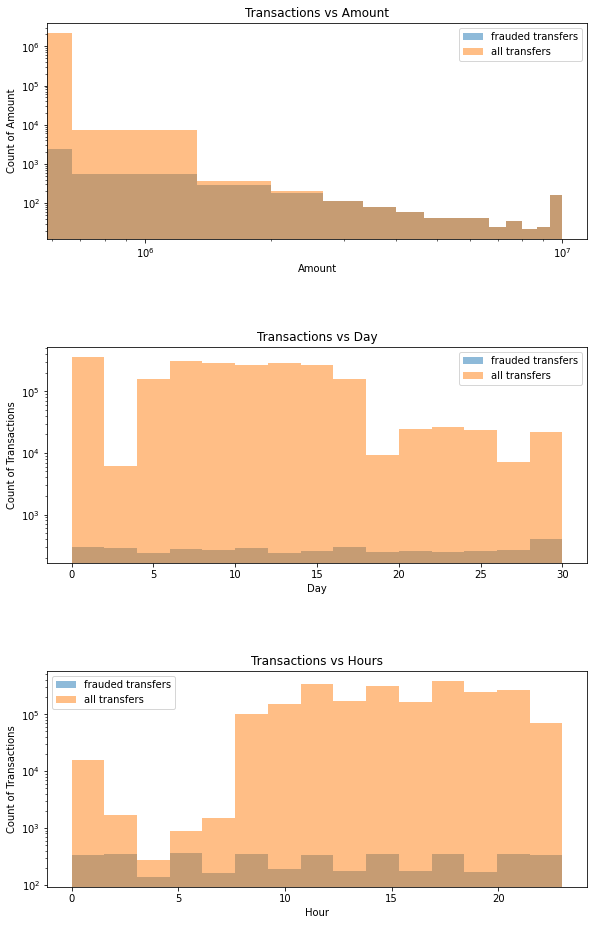

In [96]:
fig = plt.figure(figsize = (3,3))

ax1 = fig.add_axes([0,1,2.5,1])
ax1.hist(df[(df['type'] == 'CASH_OUT')&(df['isFraud'] == 1)]["hour"], bins=15, alpha=0.5, label="frauded transfers")
ax1.hist(df[(df['type'] == 'CASH_OUT')]["hour"], bins=15, alpha=0.5, label="all transfers")
ax1.set_xlabel("Hour")
ax1.set_ylabel("Count of Transactions")
ax1.set_title("Transactions vs Hours")
ax1.legend()
plt.yscale('log')

ax2 = fig.add_axes([0,2.5,2.5,1])
ax2.hist(df[(df['type'] == 'CASH_OUT')&(df['isFraud'] == 1)]["day"], bins=15, alpha=0.5, label="frauded transfers")
ax2.hist(df[(df['type'] == 'CASH_OUT')]["day"], bins=15, alpha=0.5, label="all transfers")
ax2.set_xlabel("Day")
ax2.set_ylabel("Count of Transactions")
ax2.set_title("Transactions vs Day")
ax2.legend()
plt.yscale('log')

ax3 = fig.add_axes([0,4,2.5,1])
ax3.hist(df[(df['type'] == 'CASH_OUT')&(df['isFraud'] == 1)]["amount"], bins=15, alpha=0.5, label="frauded transfers")
ax3.hist(df[(df['type'] == 'CASH_OUT')]["amount"], bins=15, alpha=0.5, label="all transfers")
ax3.set_xlabel("Amount")
ax3.set_ylabel("Count of Amount")
ax3.set_title("Transactions vs Amount")
ax3.legend()
plt.xscale('log')
plt.yscale('log')

- Same behavior as All Transactions vs All Fraud. So we do not differ CASH_OUT behavior from others.

In [72]:
df[(df['type'] == 'CASH_OUT')&(df['isFraud'] == 1)].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,hour
count,4116.000000,4.116000e+03,4.116000e+03,4116.000000,4.116000e+03,4.116000e+03,4116.0,4116.0,4116.000000,4116.000000
mean,367.720360,1.455103e+06,1.453869e+06,72.586883,1.084918e+06,2.549545e+06,1.0,0.0,14.840379,11.551263
std,216.670186,2.393842e+06,2.394506e+06,4656.888395,4.650482e+06,5.220285e+06,0.0,0.0,9.033408,6.871679
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.0,0.0,0.000000,0.000000
25%,180.000000,1.254644e+05,1.232310e+05,0.000000,0.000000e+00,3.562813e+05,1.0,0.0,7.000000,6.000000
50%,367.000000,4.355169e+05,4.336777e+05,0.000000,1.449701e+05,1.050828e+06,1.0,0.0,15.000000,12.000000
75%,558.000000,1.500761e+06,1.500761e+06,0.000000,7.947107e+05,3.013796e+06,1.0,0.0,23.000000,17.000000
max,743.000000,1.000000e+07,1.000000e+07,298767.610000,2.362305e+08,2.367265e+08,1.0,0.0,30.000000,23.000000


In [113]:
df[(df['type'] == 'CASH_OUT')&(df['isFraud'] == 0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.00,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.00,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.00,6453430.91,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362306,718,CASH_OUT,169291.34,C1569237054,26919.00,0.0,C342077848,2684602.16,2853893.50,0,0
6362313,718,CASH_OUT,111963.72,C1438119383,4514.00,0.0,C99772923,154925.27,266888.99,0,0
6362317,718,CASH_OUT,317177.48,C857156502,170.00,0.0,C784108220,345042.13,662219.61,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.00,0.0,C1818183087,0.00,159188.22,0,0


In [114]:
df[(df['type'] == 'CASH_OUT')&(df['isFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


- Cash_Out non-fraud cases have not well defined behavior looking at amount and oldbalance Dest;
- But fraud cases have well defined behavior looking at oldbalanceOrg and newbalanceOrig.

In [144]:
df0.loc[(df0['type'] == 'CASH_IN') | (df0['type'] == 'CASH_OUT')&(df['isFraud'] == 1)][310:320]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1727,1,CASH_IN,455440.65,C1125098735,6205682.96,6661123.62,C248609774,5861124.98,6453430.91,0,0
1728,1,CASH_IN,135327.21,C392289808,6661123.62,6796450.83,C1100767002,368697.57,233370.36,0,0
1729,1,CASH_IN,211094.41,C585074510,6796450.83,7007545.23,C1688019098,447894.40,97263.78,0,0
1730,1,CASH_IN,189595.83,C1699486292,7007545.23,7197141.06,C662736689,254271.98,4891090.56,0,0
1731,1,CASH_IN,66413.56,C1541075662,7197141.06,7263554.62,C1590550415,19341041.88,19169204.93,0,0
1805,1,CASH_IN,67200.07,C1448277333,108912.00,176112.07,C243745864,0.00,0.00,0,0
1870,1,CASH_OUT,25071.46,C1275464847,25071.46,0.00,C1364913072,9083.76,34155.22,1,0
1886,1,CASH_IN,2673.64,C1164394344,768815.91,771489.55,C1330400026,135676.32,817.21,0,0
1911,1,CASH_OUT,132842.64,C13692003,4499.08,0.00,C297927961,0.00,132842.64,1,0
2025,1,CASH_IN,47440.86,C168468389,201780.95,249221.81,C200224114,0.00,0.00,0,0


# **3.0.0 Treating Categorical Variables**

- nameOrig and nameDest will be droped since 

In [8]:
df = df.join(pd.get_dummies(df['type']))

In [9]:
df = df.drop(['nameOrig','nameDest','type','step'], axis = 1)

In [10]:
is_Fraud_column = df['isFraud']

In [11]:
df = df.drop(['isFraud'], axis = 1)

In [12]:
df['isFraud'] = is_Fraud_column

In [13]:
df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,day,hour,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,1,0,0,0,1,0,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,1,0,0,0,1,0,0
2,181.00,181.00,0.00,0.00,0.00,0,0,1,0,0,0,0,1,1
3,181.00,181.00,0.00,21182.00,0.00,0,0,1,0,1,0,0,0,1
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,0,30,23,0,1,0,0,0,1
6362616,6311409.28,6311409.28,0.00,0.00,0.00,0,30,23,0,0,0,0,1,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,30,23,0,1,0,0,0,1
6362618,850002.52,850002.52,0.00,0.00,0.00,0,30,23,0,0,0,0,1,1


- This is our final dataset

# **4.0.0 Model**

## 4.1.0 XGBoost (using default parameters)

In [16]:
import xgboost as xgb
from xgboost import cv
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
import shap

In [17]:
X = df.iloc[:,0:13]
Y = df.iloc[:,13]

In [18]:
X = df.iloc[:,0:13]
Y = df.iloc[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)

In [19]:
model = XGBClassifier()
model.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:40:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

### 4.1.1 Classification Report

In [20]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [21]:
tn, fp, fn, tp = (confusion_matrix(y_test,y_pred).ravel())
print(tn, fp, fn, tp)

1588597 56 216 1782


In [22]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,y_pred))

Accuracy: 99.98%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588653
           1       0.97      0.89      0.93      1998

    accuracy                           1.00   1590651
   macro avg       0.98      0.95      0.96   1590651
weighted avg       1.00      1.00      1.00   1590651



- Accuracy = (tp + fp) / (tp + fp + tn + fn) <br/>
Definição: porcentagem do dataset prevista como fraude <br/>
<br/>
- Precision = tp / (tp + fp) <br/>
Definição: das observações consideradas fraudes quantas são realmente fraude <br/>
<br/>
- Recall = tp / (tp + fn) <br/>
Definição: das fraudes reais do dataset quantas o modelo enquadrou corretamente <br/>
<br/>
- F1 Score: média de Precision e Recall

https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/

### 4.1.3 Curva Precision-Recall

In [23]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

Logistic: f1=0.929 auc=0.973


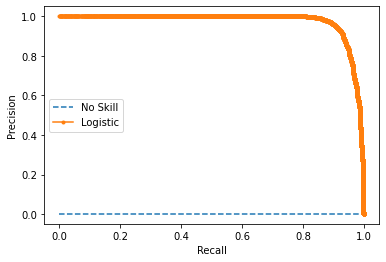

In [24]:
probs = model.predict_proba(X_test)
preds = probs[:,1]

lr_precision, lr_recall, _ = precision_recall_curve(y_test, preds)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

- Como o próprio nome diz a curva mostra o comportamento de Precision e Recall. A primeira tentativa foi feita com a curva ROC porém por se tratar de um dataset desbalanceado uma curva que levava em conta os falsos positivos, ou seja, transações sem fraude, não ficaria muito representativa.


### 4.1.3 Cross Validation

In [109]:
params = {"objective":"binary:logistic",'colsample_bytree': 1,'learning_rate': 0.3,
                'max_depth': 6, 'alpha': 10}
data_dmatrix = xgb.DMatrix(data=X,label=Y)
xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=10, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [110]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.791388,0.001772,0.791344,0.003623
1,0.788993,0.001793,0.788953,0.006931
2,0.789028,0.001742,0.788991,0.006876
3,0.910319,0.002225,0.909193,0.007154
4,0.940947,0.003590,0.940336,0.006336
5,0.941064,0.003424,0.940458,0.006143
6,0.941117,0.003418,0.940509,0.006104
7,0.941683,0.002914,0.941105,0.005732
8,0.946741,0.002396,0.946695,0.003460
9,0.946416,0.001058,0.946387,0.002483


- Não houve grande variação dos outputs de média e desvio padrão do accuracy score no Cross Validation.

### 4.1.4 Feature Importance

In [1]:
xgb.plot_importance(model)

NameError: name 'xgb' is not defined

- Por default plot_importance usa o Weight. O Weight leva em conta a quantidade de vezes que determinada feature aparece nas árvores. Quando comparamos a possibilidade de features binários e contínuas aparecerem em árvores é fato que as contínuas aparecem mais por possibilitarem um range maior para participar de um split (ex: binário temos apenas dois valores, 0 e 1. Enquanto que features contínuas têm normalmente um range bem maior por exemplo idade de 1 até 80 anos)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

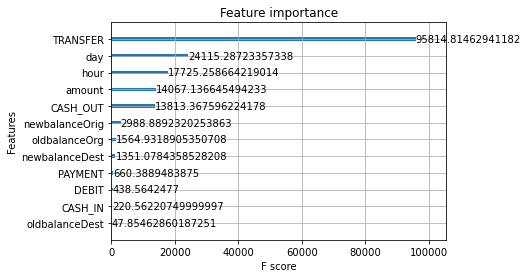

In [112]:
xgb.plot_importance(model,importance_type="cover")

- Quantas linhas tiveram suas predições influenciadas por determinada feature.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

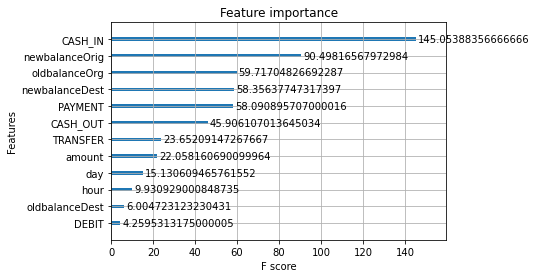

In [113]:
xgb.plot_importance(model,importance_type="gain")

- O Gain mede a contribuição positiva de cada feature para fazer as predições 

In [146]:
df.loc[(df['type'] == 'CASH_IN') | (df0['type'] == 'CASH_OUT')&(df['isFraud'] == 1)][315:325]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1805,1,CASH_IN,67200.07,C1448277333,108912.00,176112.07,C243745864,0.00,0.00,0,0
1870,1,CASH_OUT,25071.46,C1275464847,25071.46,0.00,C1364913072,9083.76,34155.22,1,0
1886,1,CASH_IN,2673.64,C1164394344,768815.91,771489.55,C1330400026,135676.32,817.21,0,0
1911,1,CASH_OUT,132842.64,C13692003,4499.08,0.00,C297927961,0.00,132842.64,1,0
2025,1,CASH_IN,47440.86,C168468389,201780.95,249221.81,C200224114,0.00,0.00,0,0
2064,1,CASH_IN,64945.57,C2000410491,20170.00,85115.57,C401424608,1818709.46,1178808.14,0,0
2126,1,CASH_IN,168451.53,C501036152,30040.03,198491.56,C1831477404,707354.01,247063.16,0,0
2127,1,CASH_IN,123545.77,C261567641,198491.56,322037.33,C1721246982,1739653.99,1114787.21,0,0
2128,1,CASH_IN,28463.91,C1295225869,322037.33,350501.24,C1335050193,380057.08,353532.56,0,0
2129,1,CASH_IN,42012.45,C1137667747,350501.24,350501.24,C667346055,350501.24,9291619.62,0,0


In [129]:
df0.loc[(df0['type'] == 'CASH_OUT') & (df0['nameDest'] == 'C1364913072')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1870,1,CASH_OUT,25071.46,C1275464847,25071.46,0.00,C1364913072,9083.76,34155.22,1,0
2459,1,CASH_OUT,14166.38,C1018742990,595572.48,581406.10,C1364913072,34155.22,47409.85,0,0
4746,4,CASH_OUT,8502.55,C1895102622,0.00,0.00,C1364913072,21130.68,29633.23,0,0
76149,10,CASH_OUT,579202.75,C1058587741,0.00,0.00,C1364913072,4179231.15,4979624.69,0,0
76211,10,CASH_OUT,221190.79,C1135683604,631387.17,410196.38,C1364913072,4758433.90,4979624.69,0,0
170988,12,CASH_OUT,101472.75,C657333648,0.00,0.00,C1364913072,5137162.73,5464456.72,0,0
205434,13,CASH_OUT,225821.25,C551905996,0.00,0.00,C1364913072,5238635.47,5464456.72,0,0
242240,14,CASH_OUT,535157.74,C1460574385,0.00,0.00,C1364913072,4950389.06,6161370.78,0,0
359091,17,CASH_OUT,591725.29,C730399237,4028.00,0.00,C1364913072,6161370.78,6753096.07,0,0
490306,19,CASH_OUT,2367.46,C1932953851,100382.00,98014.54,C1364913072,6195034.62,6197402.09,0,0


- Em CASH_IN não existe casos de fraude e também não há uma correlação de CASH_IN com CASH_OUT ou TRANSFER (casos com fraude). Além disso em CASH_IN alguns números não fazem sentido para operação (por exemplo as colunas de balanço do destinatário serem influenciadas pela operação). Portanto para os próximos modelos iremos desconsiderar CASH_IN pois apenas gera ruído.

### 4.1.5 SHAP

In [25]:
shap.initjs()

In [26]:
X_sampled = X_train.sample(100, random_state=10)

In [27]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sampled)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [28]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled.iloc[0,:])

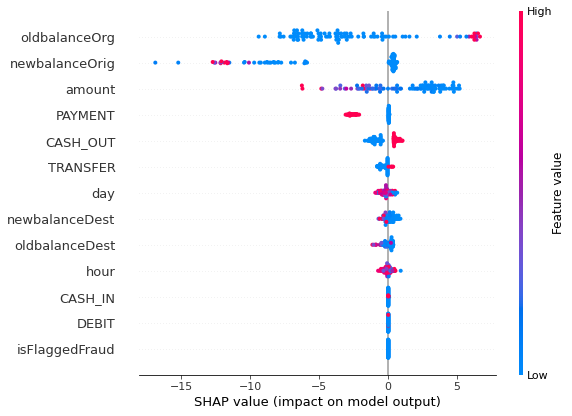

In [29]:
shap.summary_plot(shap_values, X_sampled)

## 4.2.0 XGBoost (trying to underfit the model)

### Previous Parameters
model = XGBClassifier(
    learning_rate=0.3,
    max_depth=6,
    min_child_weight = 1,
    gamma = 0,
    scale_pos_weight=1,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    max_delta_step=0)

In [147]:
X = df.iloc[:,0:13]
Y = df.iloc[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [24]:
model2 = XGBClassifier(
    learning_rate=0.3, #mantida para fazer o peso de cada iteração ser maior -> menos iterações
    max_depth=3, #diminuída para as árvores serem menores -> menor steps e menos precisão
    min_child_weight = 1.5, #aumentado - define o cover máximo permitido para leafs. Cover faz parte do denominador do Score de Similaridade que leva em conta a probabilidade da leaf anterior
    gamma = 1, #aumentado - com "gain-gamma" negativo a leaf é prunada tornando a árvore menor
    subsample=0.5, #diminuído - pega uma % do set de treino para buildar uma tree, quanto maior a porcentagem mais refinado o modelo
    colsample_bytree=0.5, #diminuído - pega uma % de colunas para treinar o modelo. Isso é feito para que determinadas features que possam ter um peso maio não apareceçam sempre
    n_estimators = 50
)
model2.fit(X_train, y_train)

[20:57:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1.5, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [150]:
y_pred2 = model2.predict(X_test)
predictions = [round(value) for value in y_pred2]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,y_pred2))

Accuracy: 99.97%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.98      0.77      0.86      2045

    accuracy                           1.00   1590655
   macro avg       0.99      0.89      0.93   1590655
weighted avg       1.00      1.00      1.00   1590655



In [151]:
tn, fp, fn, tp = (confusion_matrix(y_test,y_pred2).ravel())
print(tn, fp, fn, tp)

1588574 36 464 1581


Logistic: f1=0.863 auc=0.901


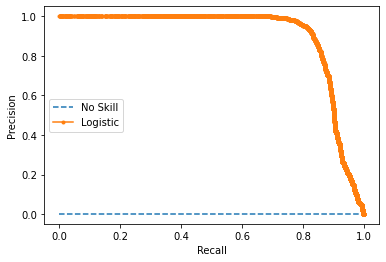

In [152]:
probs2 = model2.predict_proba(X_test)
preds2 = probs2[:,1]

lr_precision, lr_recall, _ = precision_recall_curve(y_test, preds2)
lr_f1, lr_auc = f1_score(y_test, y_pred2), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [25]:
explainer2 = shap.TreeExplainer(model2)
shap_values2 = explainer2.shap_values(X_sampled)

In [26]:
shap.force_plot(explainer2.expected_value, shap_values2[0,:], X_sampled.iloc[0,:])

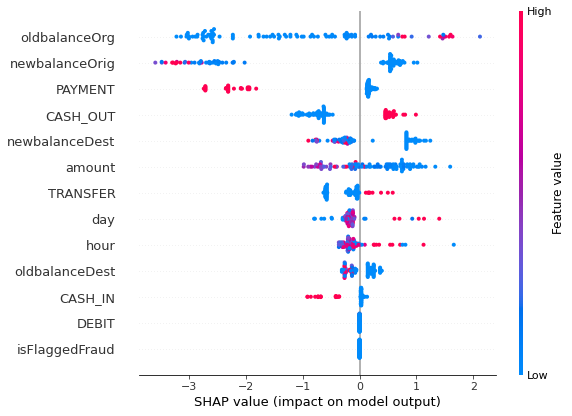

In [27]:
shap.summary_plot(shap_values2, X_sampled)

## 4.2.0 XGBoost (trying to underfit the model)

### Previous Parameters
model = XGBClassifier(
    learning_rate=0.3,
    max_depth=6,
    min_child_weight = 1,
    gamma = 0,
    scale_pos_weight=1,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    max_delta_step=0)

In [147]:
X = df.iloc[:,0:13]
Y = df.iloc[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [167]:
model3 = XGBClassifier(
    learning_rate=0.3, #mantida para fazer o peso de cada iteração ser maior -> menos iterações
    max_depth=3, #diminuída para as árvores serem menores -> menor steps e menos precisão
    min_child_weight = 1.5, #aumentado - define o cover máximo permitido para leafs. Cover faz parte do denominador do Score de Similaridade que leva em conta a probabilidade da leaf anterior
    gamma = 5, #aumentado - com "gain-gamma" negativo a leaf é prunada tornando a árvore menor
    subsample=0.5, #diminuído - pega uma % do set de treino para buildar uma tree, quanto maior a porcentagem mais refinado o modelo
    colsample_bytree=0.5, #diminuído - pega uma % de colunas para treinar o modelo. Isso é feito para que determinadas features que possam ter um peso maio não apareceçam sempre
    n_estimators = 10
)
model3.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[00:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1.5, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [168]:
y_pred3 = model3.predict(X_test)
predictions = [round(value) for value in y_pred3]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,y_pred3))

Accuracy: 99.91%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       1.00      0.29      0.45      2045

    accuracy                           1.00   1590655
   macro avg       1.00      0.64      0.72   1590655
weighted avg       1.00      1.00      1.00   1590655



In [169]:
tn, fp, fn, tp = (confusion_matrix(y_test,y_pred3).ravel())
print(tn, fp, fn, tp)

1588609 1 1458 587


Logistic: f1=0.446 auc=0.746


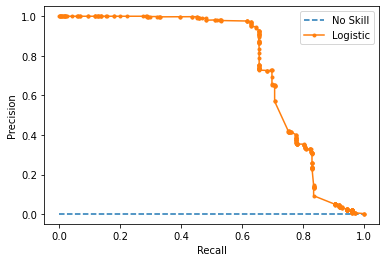

In [170]:
probs3 = model3.predict_proba(X_test)
preds3 = probs3[:,1]

lr_precision, lr_recall, _ = precision_recall_curve(y_test, preds3)
lr_f1, lr_auc = f1_score(y_test, y_pred3), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [171]:
explainer3 = shap.TreeExplainer(model3)
shap_values3 = explainer3.shap_values(X_sampled)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [172]:
shap.force_plot(explainer3.expected_value, shap_values3[0,:], X_sampled.iloc[0,:])

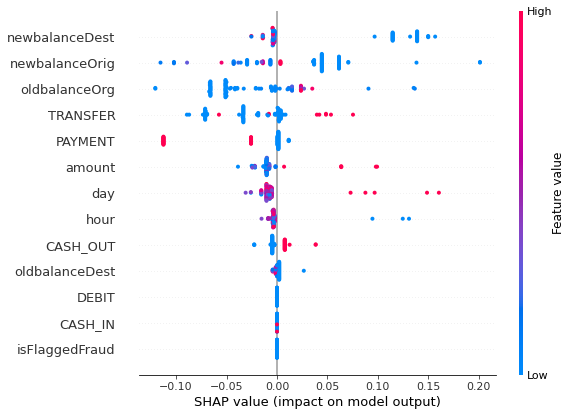

In [173]:
shap.summary_plot(shap_values3, X_sampled)

# Permutation em CASH_IN(antes tentamos em Amount)

In [22]:
import numpy as np
df1 = df
df1['CASH_IN'] = np.random.permutation(df1['CASH_IN'].values)

In [34]:
df1

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,day,hour,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,1,0,0,0,1,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,1,0,0,0,1,0,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,1,0,0,0,0,1,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,0,1,0,1,0,0,0,1
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,0,30,23,1,1,0,0,0,1
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,0,30,23,0,0,0,0,1,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,30,23,0,1,0,0,0,1
6362618,743,850002.52,850002.52,0.00,0.00,0.00,0,30,23,0,0,0,0,1,1


In [53]:
X = df1.iloc[:,0:14]
Y = df1.iloc[:,14]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [25]:
model3 = XGBClassifier()
model3.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [26]:
y_pred3 = model3.predict(X_test)

In [27]:
y_pred3 = model3.predict(X_test)
predictions = [round(value) for value in y_pred3]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,y_pred3))

Accuracy: 99.98%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.98      0.90      0.93      2045

    accuracy                           1.00   1590655
   macro avg       0.99      0.95      0.97   1590655
weighted avg       1.00      1.00      1.00   1590655



Logistic: f1=0.934 auc=0.975


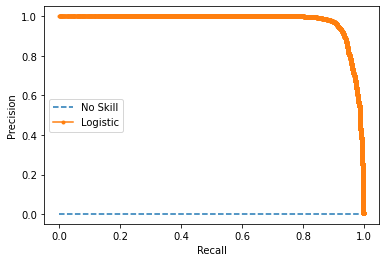

In [32]:
probs3 = model3.predict_proba(X_test)
preds3 = probs3[:,1]

lr_precision, lr_recall, _ = precision_recall_curve(y_test, preds3)
lr_f1, lr_auc = f1_score(y_test, y_pred3), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

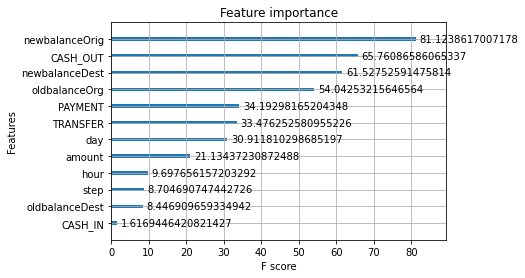

In [29]:
xgb.plot_importance(model3,importance_type="gain")

In [79]:
explainer3 = shap.TreeExplainer(model3)
shap_values3 = explainer3.shap_values(X_sampled)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [80]:
shap.force_plot(explainer3.expected_value, shap_values3[0,:], X_sampled.iloc[0,:])

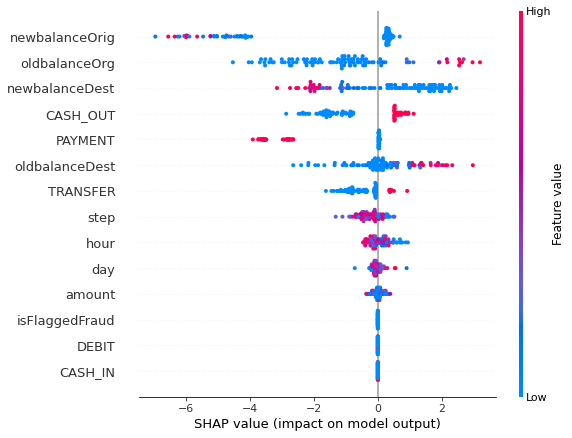

In [81]:
shap.summary_plot(shap_values3, X_sampled)

# Permutation em tudo + Ajuste de parâmetros

In [103]:
import numpy as np
df2 = df
df2['step'] = np.random.permutation(df['step'].values)
df2['amount'] = np.random.permutation(df['amount'].values)
df2['oldbalanceOrg'] = np.random.permutation(df['oldbalanceOrg'].values)
df2['newbalanceOrig'] = np.random.permutation(df['newbalanceOrig'].values)
df2['oldbalanceDest'] = np.random.permutation(df['oldbalanceDest'].values)
df2['newbalanceDest'] = np.random.permutation(df['newbalanceDest'].values)
df2['isFlaggedFraud'] = np.random.permutation(df['isFlaggedFraud'].values)
df2['day'] = np.random.permutation(df['day'].values)
df2['hour'] = np.random.permutation(df['hour'].values)
df2['CASH_IN'] = np.random.permutation(df['CASH_IN'].values)
df2['CASH_OUT'] = np.random.permutation(df['CASH_OUT'].values)
df2['DEBIT'] = np.random.permutation(df['DEBIT'].values)
df2['PAYMENT'] = np.random.permutation(df['PAYMENT'].values)
df2['TRANSFER'] = np.random.permutation(df['TRANSFER'].values)

In [104]:
df2

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,day,hour,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
0,0.00,32362.39,0.00,0.00,298590.56,0.00,0.00,1059513.02,601458.26,0.00,0.00,0.00,214581.15,442473.37,0
1,1737696.56,0.00,0.00,0.00,5183219.87,0.00,220753.39,0.00,0.00,0.00,0.00,589967.31,0.00,928155.74,0
2,452981.68,0.00,2581447.86,509960.84,0.00,115182.21,0.00,2346307.26,0.00,348754.68,2207339.12,0.00,762042.42,2046452.79,1
3,515076.83,7190978.36,1285034.67,5465065.10,104638.53,4909284.54,0.00,1620459.45,0.00,227505.69,422579.02,234100.93,1769240.84,408771.77,1
4,162831.70,46092.09,1147771.92,295634.96,0.00,0.00,1077591.17,793759.65,0.00,1221419.30,1066997.87,3660060.12,0.00,923897.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,5914118.99,0.00,0.00,0.00,0.00,8416753.64,0.00,401914.10,0.00,0.00,5116977.66,0.00,0.00,104868.67,1
6362616,1521351.50,0.00,0.00,0.00,2031165.57,0.00,3004854.67,0.00,259369.97,0.00,762158.74,0.00,0.00,2313953.36,1
6362617,2337587.55,70491279.67,260676.36,82772.95,1104099.44,169761.03,51065694.13,1503021.76,525419.89,0.00,165373.45,252437.33,775298.50,0.00,1
6362618,1896619.76,34442.41,765809.60,2846133.55,1151174.14,11658.16,0.00,137195.19,0.00,952747.78,0.00,1118302.63,0.00,0.00,1


In [105]:
X = df2.iloc[:,0:14]
Y = df2.iloc[:,14]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [107]:
model4 = XGBClassifier(
    learning_rate=0.3, #aumentada para fazer o peso de cada iteração ser maior -> menos iterações
    max_depth=3, #diminuída para as árvores serem menores -> menor steps e menos precisão
    min_child_weight = 1.5, #aumentado - define o cover máximo permitido para leafs. Cover faz parte do denominador do Score de Similaridade que leva em conta a probabilidade da leaf anterior
    gamma = 0.3, #aumentado - com "gain-gamma" negativo a leaf é prunada tornando a árvore menor
    subsample=0.5, #diminuído - pega uma % do set de treino para buildar uma tree, quanto maior a porcentagem mais refinado o modelo
    colsample_bytree=0.5 #diminuído - pega uma % de colunas para treinar o modelo. Isso é feito para que determinadas features que possam ter um peso maio não apareceçam sempre
)
model4.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[20:38:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1.5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [108]:
y_pred4 = model4.predict(X_test)

In [109]:
y_pred4 = model4.predict(X_test)
predictions = [round(value) for value in y_pred4]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,y_pred4))

Accuracy: 99.87%


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.00      0.00      0.00      2045

    accuracy                           1.00   1590655
   macro avg       0.50      0.50      0.50   1590655
weighted avg       1.00      1.00      1.00   1590655



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logistic: f1=0.000 auc=0.001


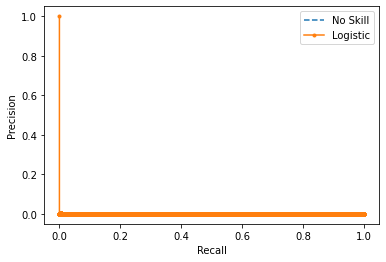

In [110]:
probs4 = model4.predict_proba(X_test)
preds4 = probs4[:,1]

lr_precision, lr_recall, _ = precision_recall_curve(y_test, preds4)
lr_f1, lr_auc = f1_score(y_test, y_pred4), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

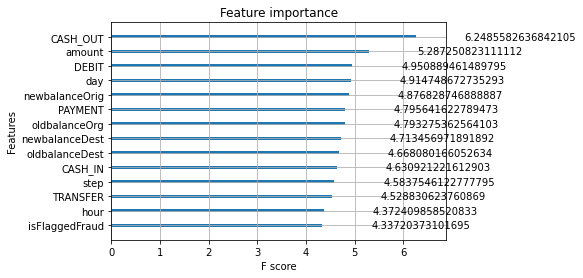

In [111]:
xgb.plot_importance(model4,importance_type="gain")

In [112]:
explainer4 = shap.TreeExplainer(model4)
shap_values4 = explainer4.shap_values(X_sampled)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [113]:
shap.force_plot(explainer4.expected_value, shap_values4[0,:], X_sampled.iloc[0,:])

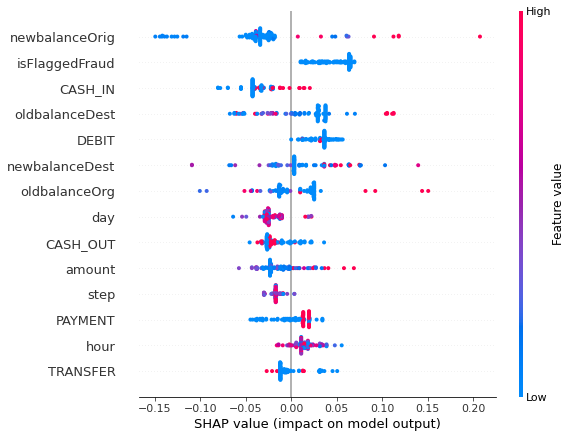

In [114]:
shap.summary_plot(shap_values4, X_sampled)